In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
titan_df = pd.read_csv('/home/sachin/Downloads/titanic/train.csv')

In [11]:
titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
print(titan_df.isnull().sum())

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64


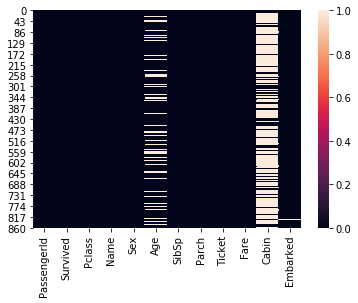

In [13]:
sns.heatmap(titan_df.isnull())

In [14]:
titan_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


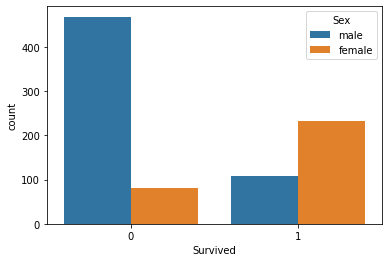

In [15]:
sns.countplot(x='Survived',data=titan_df,hue='Sex')

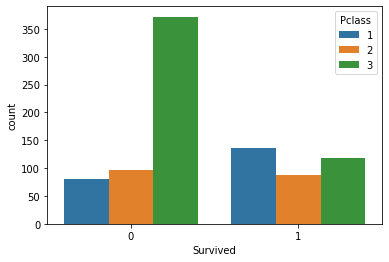

In [16]:
sns.countplot(x='Survived',data=titan_df,hue='Pclass')

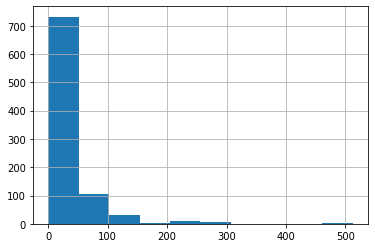

In [17]:
titan_df['Fare'].hist()

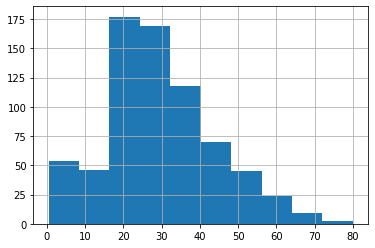

In [18]:
titan_df['Age'].hist()

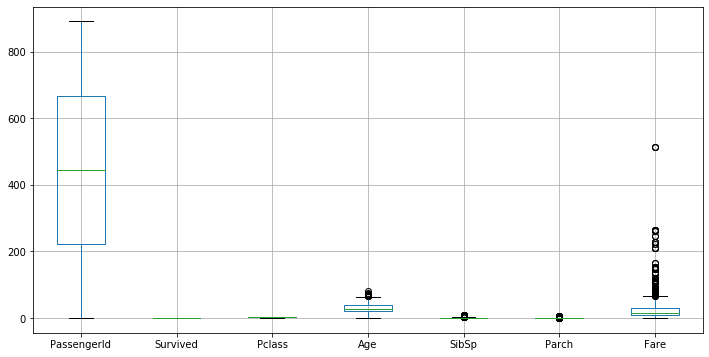

In [19]:
titan_df.boxplot(figsize=(12,6))

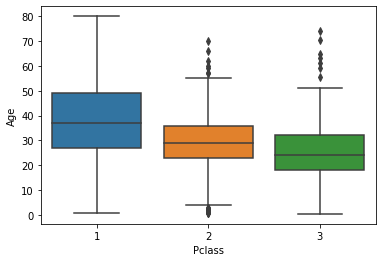

In [20]:
sns.boxplot(x='Pclass',y='Age',data=titan_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c80980a10>,
      dtype=object)

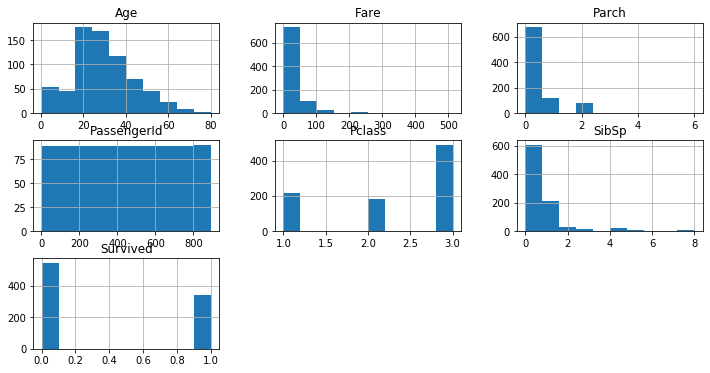

In [21]:
titan_df.hist(figsize=(12,6))

In [109]:
titan_df.groupby('Pclass').mean()['Age'].round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [112]:
mean_pclass1 = titan_df.groupby('Pclass').mean()['Age'].round().loc[1]
mean_pclass2 = titan_df.groupby('Pclass').mean()['Age'].round().loc[2]
mean_pclass3 = titan_df.groupby('Pclass').mean()['Age'].round().loc[3]

In [114]:
titan_df.loc[titan_df['Pclass']==1,'Age'] = titan_df.loc[titan_df['Pclass']==1,'Age'].fillna(value=mean_pclass1)
titan_df.loc[titan_df['Pclass']==2,'Age'] = titan_df.loc[titan_df['Pclass']==2,'Age'].fillna(value=mean_pclass2)
titan_df.loc[titan_df['Pclass']==3,'Age'] = titan_df.loc[titan_df['Pclass']==3,'Age'].fillna(value=mean_pclass3)


In [116]:
print(titan_df.isnull().sum())

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64


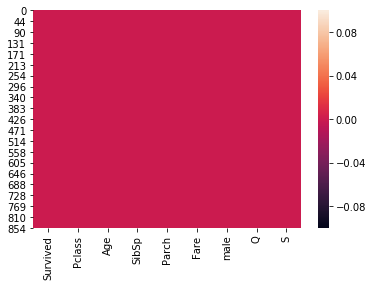

In [117]:
sns.heatmap(titan_df.isnull())

In [94]:
titan_df.drop('Cabin',axis=1,inplace=True)

In [95]:
titan_df.dropna(inplace=True)

In [97]:
sex = pd.get_dummies(titan_df['Sex'],drop_first=True) 
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
885     0
886     1
887     0
889     1
890     1

[712 rows x 1 columns]


In [99]:
embark = pd.get_dummies(titan_df['Embarked'],drop_first=True)
print(embark)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
885  1  0
886  0  1
887  0  1
889  0  0
890  1  0

[712 rows x 2 columns]


In [100]:
titan_df = pd.concat([titan_df,sex,embark],axis=1)

In [101]:
titan_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1


In [103]:
titan_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [104]:
titan_df.drop('PassengerId',axis=1,inplace=True)

In [105]:
titan_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [108]:
test = pd.read_csv('/home/sachin/Downloads/titanic/test.csv')

In [118]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


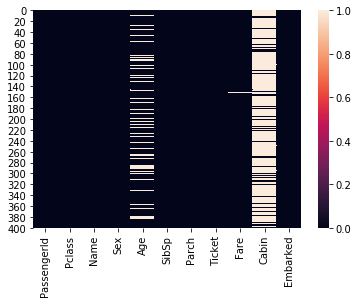

In [119]:
sns.heatmap(test.isnull())

In [120]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_pclass1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_pclass2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_pclass3)

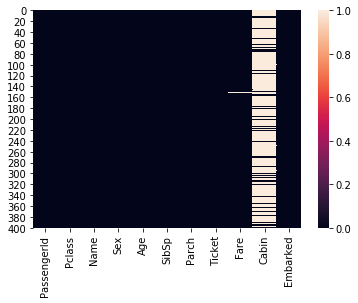

In [121]:
sns.heatmap(test.isnull())

In [122]:
test.drop('Cabin',axis=1,inplace=True)

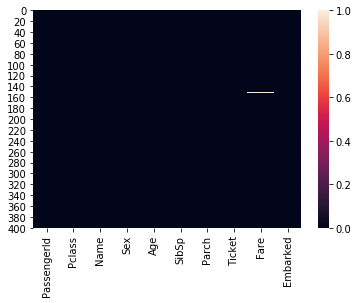

In [123]:
sns.heatmap(test.isnull())

In [124]:
test.dropna(inplace=True)

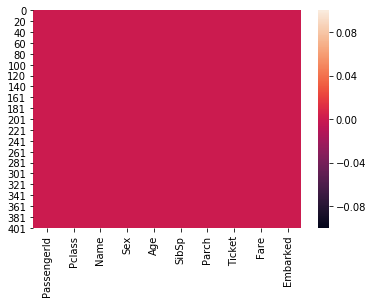

In [125]:
sns.heatmap(test.isnull())

In [126]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [127]:
test = pd.concat([test,sex,embark],axis=1)

In [128]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [129]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [133]:
x = titan_df.drop('Survived',axis=1)
y = titan_df['Survived']

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [136]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

/home/sachin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
lg.score(x_train,y_train)

0.7931726907630522

In [139]:
lg.score(x_test,y_test)

0.7850467289719626

In [142]:
predictions = lg.predict(test_x)

In [153]:
from sklearn.metrics import accuracy_score
# print("accuracy_score :", accuracy_score(predictions,y_test))

In [155]:
# aq = accuracy_score(predictions,y_test)

In [158]:
y_test.shape

(214,)

In [159]:
predictions.shape

(417,)

In [160]:
x_test.shape

(214, 8)